In [1]:
!pip install beautifulsoup4 requests

In [2]:
!pip install mplfinance

In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm
import matplotlib

# **TWSE API抓取**

In [5]:
# 將民國年轉換為西元年
def convert_to_ad(date_str):
    # 將民國年轉換為西元年
    parts = date_str.split('/')
    parts[0] = str(int(parts[0]) + 1911)  # 民國轉西元 (例如 112 + 1911 = 2023)
    return '/'.join(parts)

In [6]:
# 定義函數來抓取指定月份的股票數據
def fetch_stock_data(date, stock_no):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data['data'], columns=data['fields'])

In [7]:
def fetch_multiple_months(stock_id, start_year, start_month, end_year, end_month):
    all_data = []

    # 從起始年月到結束年月逐月抓取
    year,month = start_year, start_month

    while (year < end_year) or (year == end_year and month <= end_month):
        # 格式化日期
        date = f"{year}{str(month).zfill(2)}01"
        print(f"Fetching data for {year}-{str(month).zfill(2)}")
        # 抓取當前月份的數據
        df = fetch_stock_data(date, stock_id)

        # 將數據添加到列表中
        if df is not None:
            all_data.append(df)

        # 移動到下一個月
        month += 1
        if month > 12:
            month = 1
            year += 1

    # 將每月資料合併成一個 DataFrame
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

df = fetch_multiple_months('6214', 2020, 1, 2024, 9)
print(df)

Fetching data for 2020-01
Fetching data for 2020-02
Fetching data for 2020-03
Fetching data for 2020-04
Fetching data for 2020-05
Fetching data for 2020-06
Fetching data for 2020-07
Fetching data for 2020-08
Fetching data for 2020-09
Fetching data for 2020-10
Fetching data for 2020-11
Fetching data for 2020-12
Fetching data for 2021-01
Fetching data for 2021-02
Fetching data for 2021-03
Fetching data for 2021-04
Fetching data for 2021-05
Fetching data for 2021-06
Fetching data for 2021-07
Fetching data for 2021-08
Fetching data for 2021-09
Fetching data for 2021-10
Fetching data for 2021-11
Fetching data for 2021-12
Fetching data for 2022-01
Fetching data for 2022-02
Fetching data for 2022-03
Fetching data for 2022-04
Fetching data for 2022-05
Fetching data for 2022-06
Fetching data for 2022-07
Fetching data for 2022-08
Fetching data for 2022-09
Fetching data for 2022-10
Fetching data for 2022-11
Fetching data for 2022-12
Fetching data for 2023-01
Fetching data for 2023-02
Fetching dat

In [8]:
# 資料處理，將日期轉換為正確格式
df['日期'] = df['日期'].apply(convert_to_ad)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))

# 重新命名欄位
df.rename(columns={
    '日期': 'Date',
    '開盤價': 'Open',
    '最高價': 'High',
    '最低價': 'Low',
    '收盤價': 'Close',
    '成交股數': 'Volume'
}, inplace=True)

print(df)

           Date  Volume      成交金額   Open   High    Low  Close  漲跌價差  成交筆數
0    2020-01-02  196298  14836061   75.8   75.8   75.4   75.4  -0.1   164
1    2020-01-03  238643  17979284   75.5   75.8   75.1   75.2  -0.2   197
2    2020-01-06  390674  29199308   75.0   75.1   74.5   74.5  -0.7   297
3    2020-01-07  328176  24410088   74.6   74.8   74.0   74.5   0.0   284
4    2020-01-08  381909  28288643   74.2   74.5   73.8   74.3  -0.2   292
...         ...     ...       ...    ...    ...    ...    ...   ...   ...
1149 2024-09-24  439562  56211736  130.0  130.0  127.0  127.0  -3.0   515
1150 2024-09-25  363389  46479740  128.0  129.0  127.0  127.0   0.0   531
1151 2024-09-26  296012  37987580  128.5  129.5  127.5  127.5   0.5   373
1152 2024-09-27  387013  49504853  128.0  128.5  127.0  127.5   0.0   366
1153 2024-09-30  449067  57157815  127.5  128.5  126.5  127.0  -0.5   374

[1154 rows x 9 columns]


<Figure size 1000x600 with 0 Axes>

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35488 (\N{CJK UNIFIED IDEOGRAPH-8AA0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-9

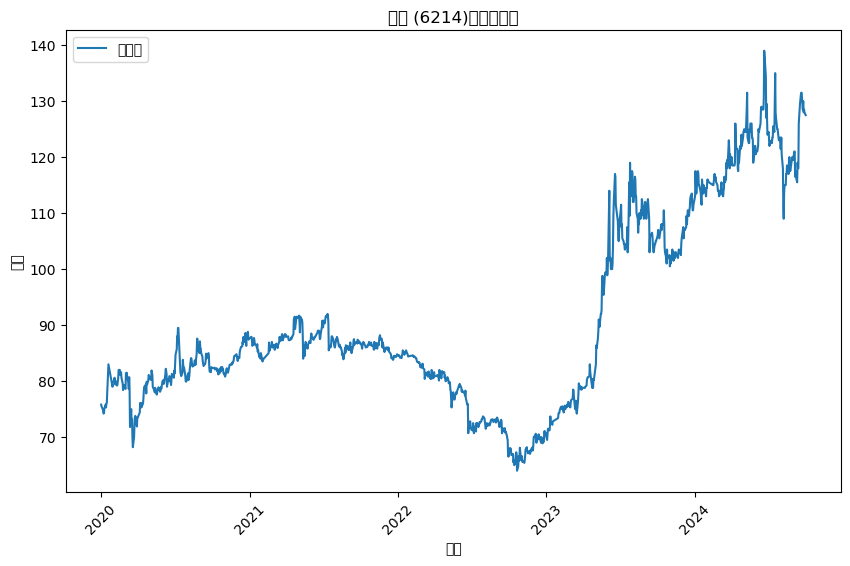

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


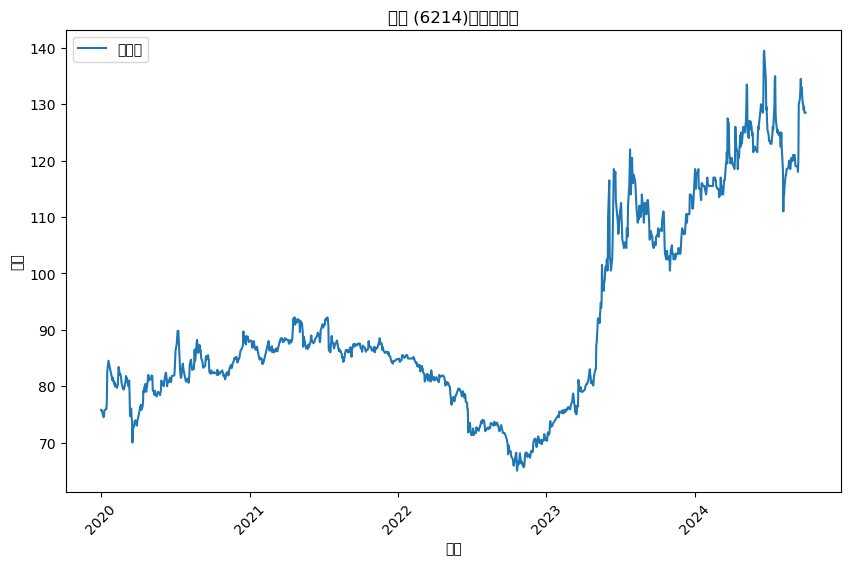

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


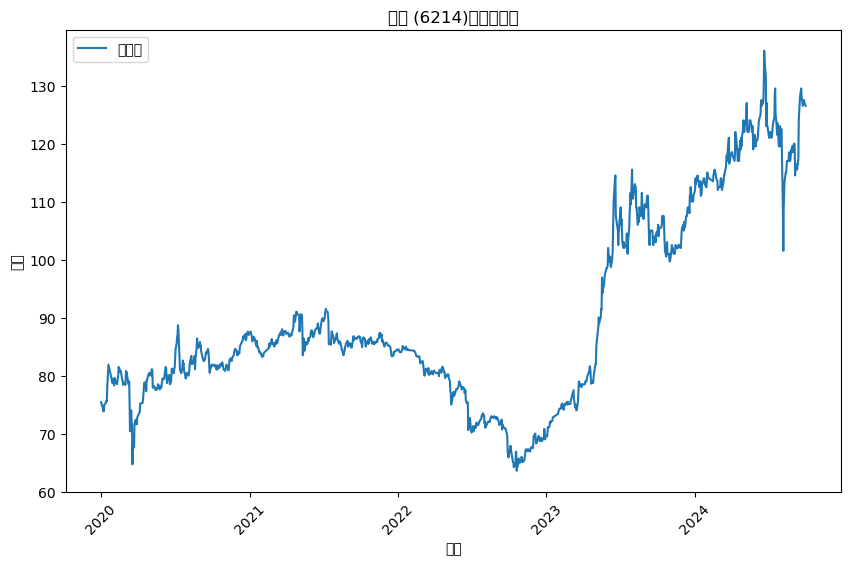

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


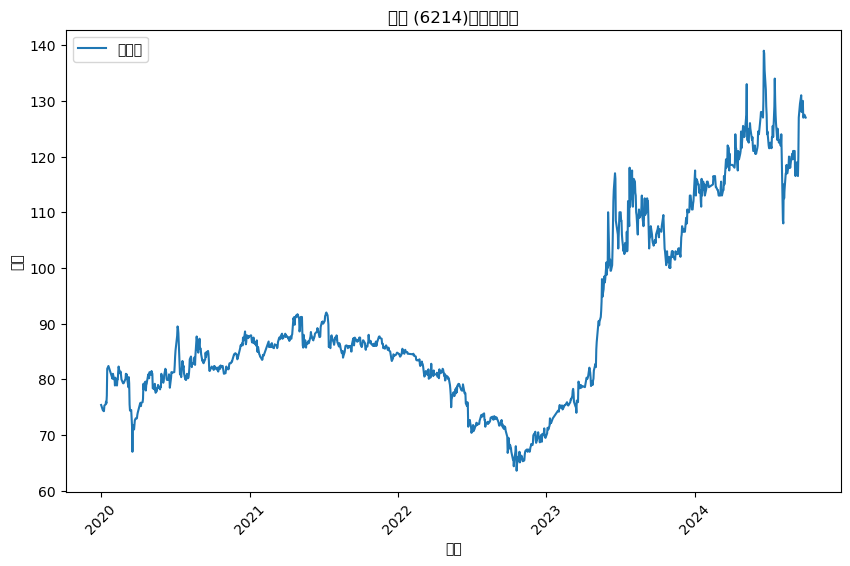

In [9]:
# 定義一個繪製函數
def plot_stock_data(df, column_name, label_name, stock_name):
  plt.figure(figsize=(10, 6))
  plt.plot(df['Date'], df[column_name], label=label_name)
  # 設定圖表標題和軸標籤
  plt.title(f'{stock_name}每日{label_name}')
  plt.xlabel('日期')
  plt.ylabel('價格')
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()

# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df, 'Open', '開盤價', '精誠 (6214)')
plot_stock_data(df, 'High', '最高價', '精誠 (6214)')
plot_stock_data(df, 'Low', '最低價', '精誠 (6214)')
plot_stock_data(df, 'Close', '收盤價', '精誠 (6214)')

# **Yahoo 奇摩抓取股票資料**

In [10]:
import yfinance as yf

# 從 Yahoo Finance 抓取股票數據 (以 AAPL 為例)
df_yahoo = yf.download('AAPL', start='2020-01-01', end='2024-09-30')

df_yahoo.reset_index(inplace=True)

# 顯示數據
print(df_yahoo)


[*********************100%***********************]  1 of 1 completed

Price                       Date   Adj Close       Close        High  \
Ticker                                  AAPL        AAPL        AAPL   
0      2020-01-02 00:00:00+00:00   72.796028   75.087502   75.150002   
1      2020-01-03 00:00:00+00:00   72.088287   74.357498   75.144997   
2      2020-01-06 00:00:00+00:00   72.662712   74.949997   74.989998   
3      2020-01-07 00:00:00+00:00   72.320984   74.597504   75.224998   
4      2020-01-08 00:00:00+00:00   73.484352   75.797501   76.110001   
...                          ...         ...         ...         ...   
1188   2024-09-23 00:00:00+00:00  226.221115  226.470001  229.449997   
1189   2024-09-24 00:00:00+00:00  227.120117  227.369995  229.350006   
1190   2024-09-25 00:00:00+00:00  226.121216  226.369995  227.289993   
1191   2024-09-26 00:00:00+00:00  227.269958  227.520004  228.500000   
1192   2024-09-27 00:00:00+00:00  227.539658  227.789993  229.520004   

Price          Low        Open     Volume  
Ticker        AAPL 

<Figure size 1000x600 with 0 Axes>

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-6

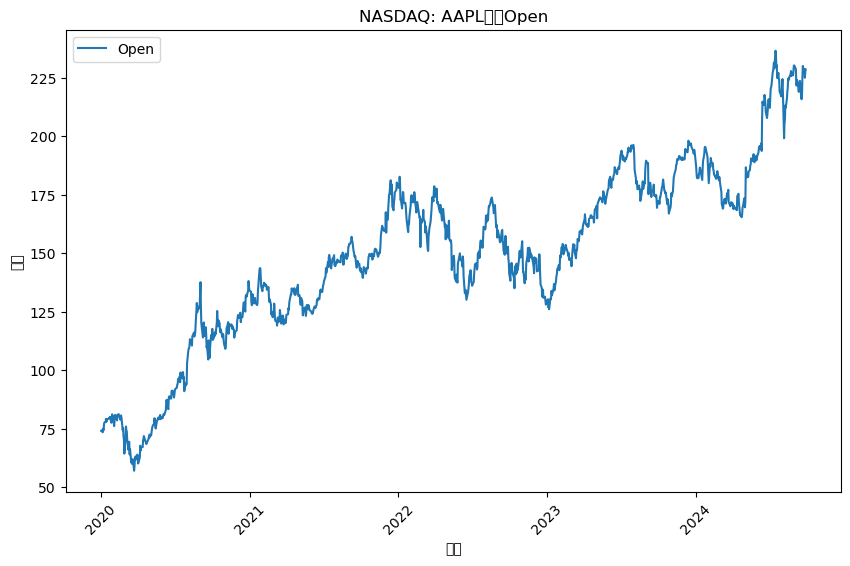

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-6

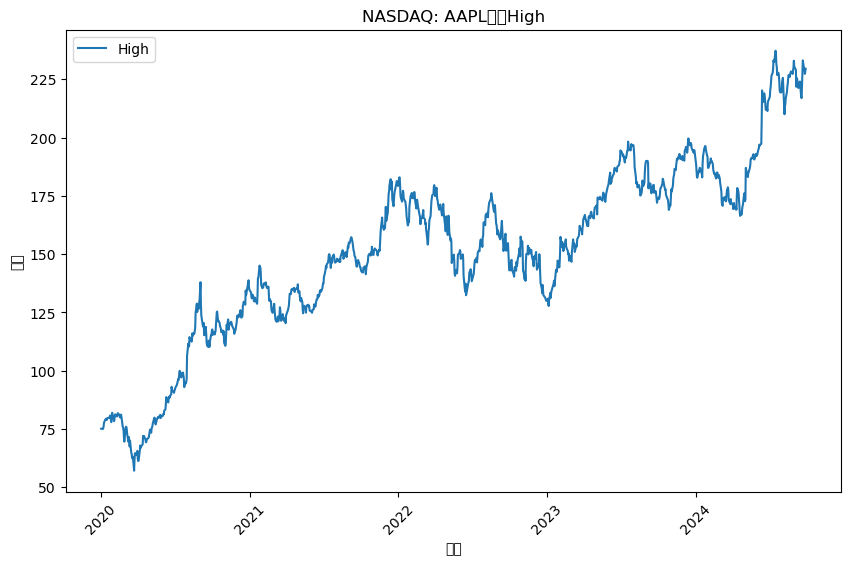

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-6

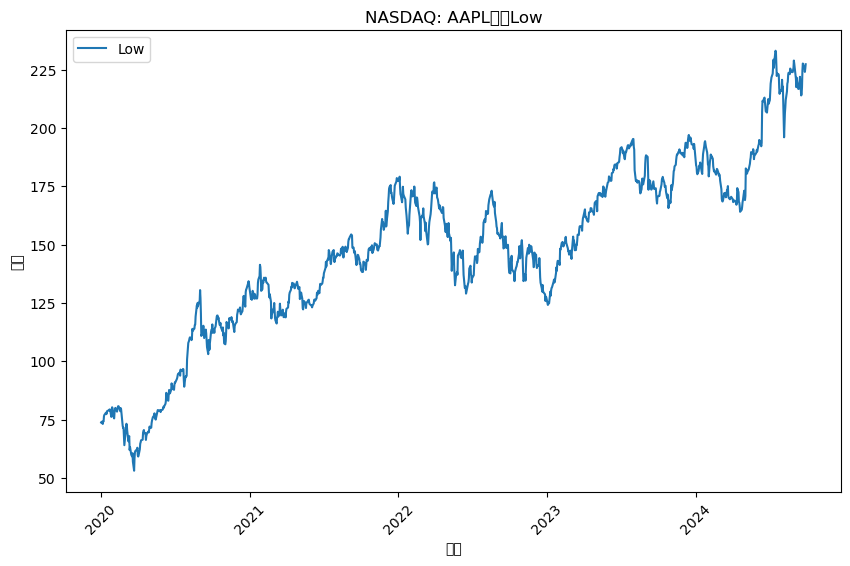

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-6

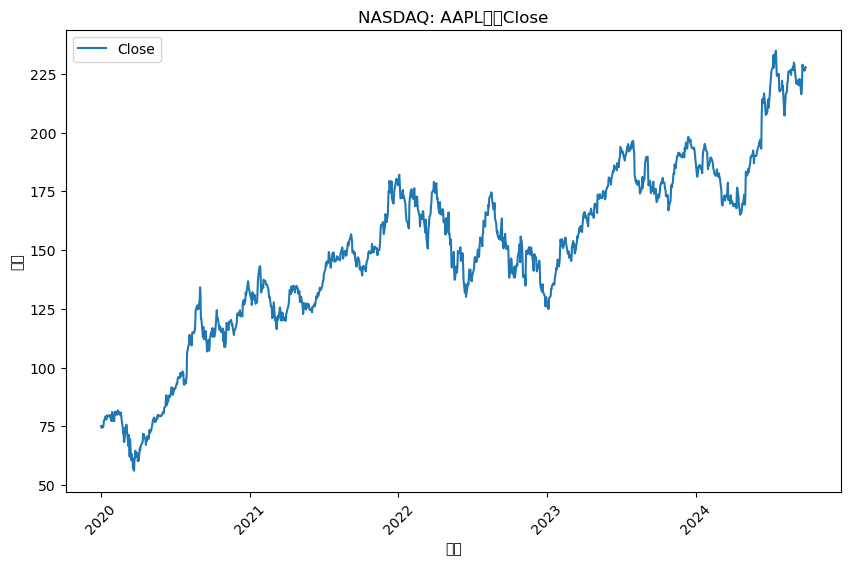

In [11]:
# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df_yahoo, 'Open', 'Open', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'High', 'High', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Low', 'Low', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Close', 'Close', 'NASDAQ: AAPL')

# **Machine Learning(LSTM)**

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

Open      1.000000
High      0.998338
Low       0.998106
Close     0.996738
Volume    0.247193
Name: Open, dtype: float64


Close     1.000000
Low       0.998548
High      0.998256
Open      0.996738
Volume    0.245197
Name: Close, dtype: float64


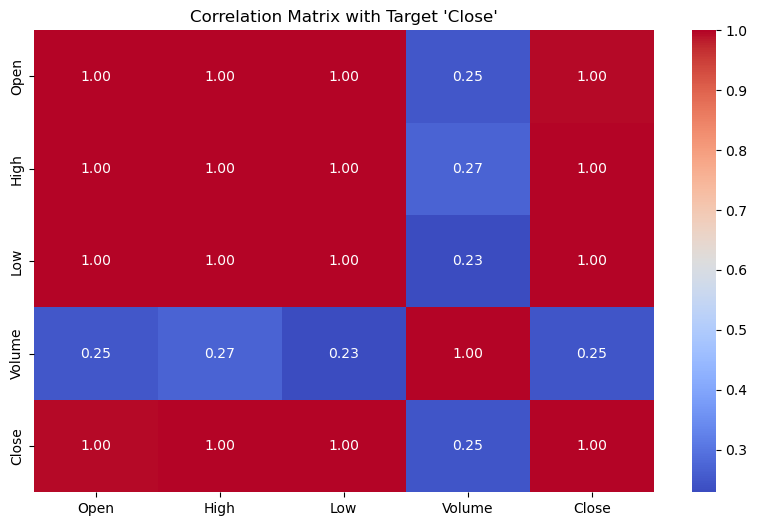

In [13]:
# 計算相關性矩陣
corr_matrix = df[['Open','High', 'Low', 'Volume', 'Close']].corr()

# 顯示與目標之間的相關性
print(corr_matrix['Open'].sort_values(ascending=False))
print("\n")
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()


Price
Open      1.000000
High      0.999238
Low       0.999238
Close     0.998291
Volume   -0.628374
Name: Open, dtype: float64


Price
Close     1.000000
High      0.999228
Low       0.999222
Open      0.998291
Volume   -0.629403
Name: Close, dtype: float64


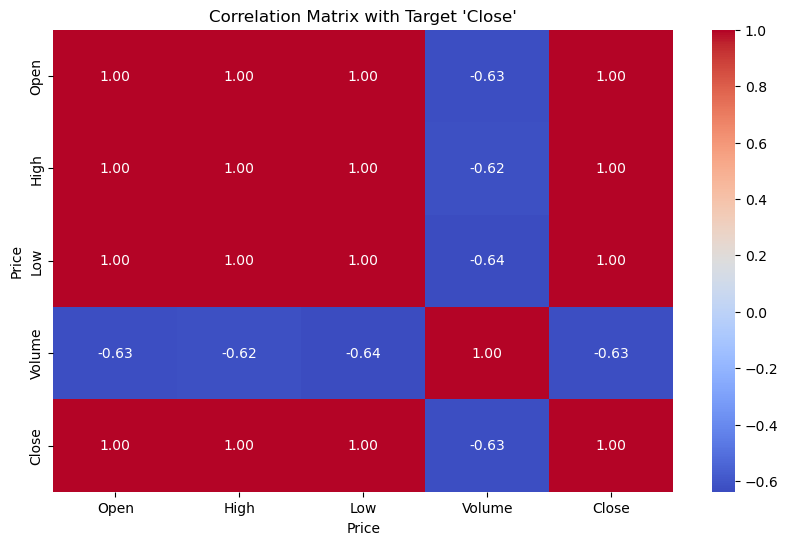

In [14]:
df_yahoo.columns = df_yahoo.columns.get_level_values(0)

# 計算相關性矩陣
corr_matrix = df_yahoo[['Open','High', 'Low', 'Volume', 'Close']].corr()

# 顯示與目標之間的相關性
print(corr_matrix['Open'].sort_values(ascending=False))
print("\n")
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()


In [15]:
def mean_absolute_percentage_error(y_true, y_pred):
    """計算 MAPE（平均絕對百分比誤差）"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    # 訓練集評估
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # 測試集評估
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"Training MAE: {train_mae}, Test MAE: {test_mae}")
    print(f"Training MAPE: {train_mape}%, Test MAPE: {test_mape}%")
    print(f"Training R²: {train_r2}, Test R²: {test_r2}")

    return train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2

In [17]:
# 評估模型表現
def evaluate_and_store_results(model_name, model, X_train_scaled, y_train, X_test_scaled, y_test, results, key_prefix):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 評估模型表現
    train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2 = evaluate_model_performance(
        model, X_train_scaled, y_train, X_test_scaled, y_test)

    # 將結果存入字典
    results[model_name] = {
        f'Train_MSE_{key_prefix}': train_mse,
        f'Test_MSE_{key_prefix}': test_mse,
        f'Train_MAE_{key_prefix}': train_mae,
        f'Test_MAE_{key_prefix}': test_mae,
        f'Train_MAPE_{key_prefix}': train_mape,
        f'Test_MAPE_{key_prefix}': test_mape,
        f'Train_R2_{key_prefix}': train_r2,
        f'Test_R2_{key_prefix}': test_r2,
        f'y_pred_{key_prefix}': y_pred
    }

In [18]:
def create_dataset(features, target, look_back=10):
    X, Y = [], []
    for i in range(len(features) - look_back):
        # X 為 look_back 天的多個特徵數據
        X.append(features[i:i + look_back])
        # Y 為對應的單一天的目標變量
        Y.append(target[i + look_back])
    return np.array(X), np.array(Y)


def build_lstm_model(shape):
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=shape))
    model.add(Dropout(0.2))
    model.add(LSTM(256))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(Dense(64))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [19]:
def plot_stock_prediction(df, train_data, test_data, predicted_data, feature='Close'):
    # 訓練資料索引
    train_index = train_data.index
    # 測試資料索引
    test_index = test_data.index

    plt.figure(figsize=(12, 6))
    plt.plot(df.loc[train_index, 'Date'], df.loc[train_index, feature], label='Training Data (True Price)', color='blue')
    plt.plot(df.loc[test_index, 'Date'], df.loc[test_index, feature], label='Test Data (True Price)', color='orange')
    plt.plot(df.loc[test_index, 'Date'][len(df.loc[test_index, 'Date']) - len(predicted_data):], predicted_data, label='Predicted Price', color='green')
    plt.title(f'{feature} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [20]:
def train_data(df, look_back=10):
    # 移除缺失值
    df = df.dropna()

    # 新增時間特徵
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Weekday'] = df['Date'].dt.weekday

    # 去除 'Open' 和 'Close' 欄位的特徵
    features = ['High', 'Low', 'Volume', 'Year', 'Month', 'Weekday']

    train_size = int(len(df) * 0.8)
    train_data = df[:train_size]
    test_data = df[train_size:]

    # 特徵標準化（分別對訓練集和測試集進行標準化）
    scaler_features = StandardScaler()
    scaled_train_features = scaler_features.fit_transform(train_data[features])
    scaled_test_features = scaler_features.transform(test_data[features])

    # 開盤價和收盤價標準化
    scaler_open = StandardScaler()
    scaler_close = StandardScaler()

    y_train_open_scaled = scaler_open.fit_transform(train_data[['Open']])
    y_test_open_scaled = scaler_open.transform(test_data[['Open']])

    y_train_close_scaled = scaler_close.fit_transform(train_data[['Close']])
    y_test_close_scaled = scaler_close.transform(test_data[['Close']])

   # 創建 LSTM 模型所需的資料集
    X_train, y_train_open_scaled = create_dataset(scaled_train_features, y_train_open_scaled, look_back)
    X_test, y_test_open_scaled = create_dataset(scaled_test_features, y_test_open_scaled, look_back)

    _, y_train_close_scaled = create_dataset(scaled_train_features, y_train_close_scaled, look_back)
    _, y_test_close_scaled = create_dataset(scaled_test_features, y_test_close_scaled, look_back)

    # 重塑數據以符合 LSTM 或 Transformer 模型的輸入格式（即 [樣本數, 序列長度, 特徵數]）
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(features)))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(features)))

    return X_train, y_train_open_scaled, X_test, y_test_open_scaled, y_train_close_scaled, y_test_close_scaled, test_data, scaler_open, scaler_close

In [21]:
def lstm_predict_stock(df, look_back=10):
    # 使用 train_data 函數準備訓練和測試資料
    X_train, y_train_open_scaled, X_test, y_test_open_scaled, y_train_close_scaled, y_test_close_scaled, test_data, scaler_open, scaler_close = train_data(df, look_back)

    results = {}

    # 訓練和預測開盤價
    print("---- 開盤價預測 ----")
    model_open = build_lstm_model((look_back, X_train.shape[2]))  # LSTM 輸入形狀為 (序列長度, 特徵數)
    model_open.fit(X_train, y_train_open_scaled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # 訓練和預測收盤價
    print("---- 收盤價預測 ----")
    model_close = build_lstm_model((look_back, X_train.shape[2]))  # LSTM 輸入形狀為 (序列長度, 特徵數)
    model_close.fit(X_train, y_train_close_scaled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # 預測開盤價和收盤價
    predicted_open = model_open.predict(X_test).reshape(-1, 1)
    predicted_close = model_close.predict(X_test).reshape(-1, 1)

    # 反標準化並將結果展平
    predicted_open = scaler_open.inverse_transform(predicted_open).flatten()
    predicted_close = scaler_close.inverse_transform(predicted_close).flatten()

    # 評估模型表現
    evaluate_and_store_results("LSTM_Open", model_open, X_train, y_train_open_scaled, X_test, y_test_open_scaled, results, "Open")
    evaluate_and_store_results("LSTM_Close", model_close, X_train, y_train_close_scaled, X_test, y_test_close_scaled, results, "Close")

    # 顯示開盤價預測結果
    plot_stock_prediction(df, df[:int(len(df) * 0.8)], test_data, predicted_open, feature='Open')

    # 顯示收盤價預測結果
    plot_stock_prediction(df, df[:int(len(df) * 0.8)], test_data, predicted_close, feature='Close')

    return {
        'predicted_open': predicted_open,
        'predicted_close': predicted_close,
        'evaluation_results': results
    }


c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

---- 開盤價預測 ----
Epoch 1/100
23/23 [==============================] - 5s 35ms/step - loss: 0.0656 - val_loss: 0.2636
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0237 - val_loss: 0.4011
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0192 - val_loss: 0.2296
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0184 - val_loss: 0.2726
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.3481
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0160 - val_loss: 0.3121
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.2521
Epoch 8/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0133 - val_loss: 0.3204
Epoch 9/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0124 - val_loss: 0.1205
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss:

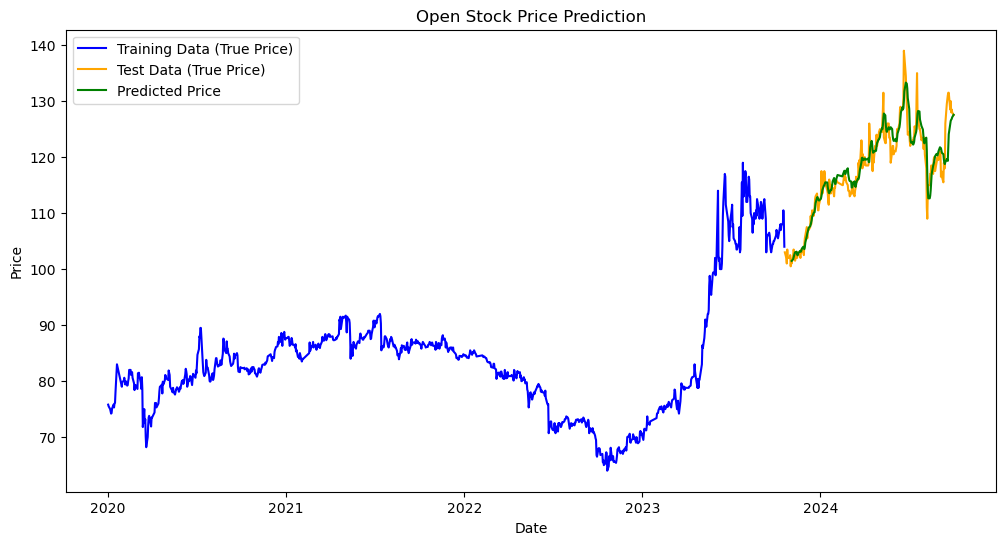

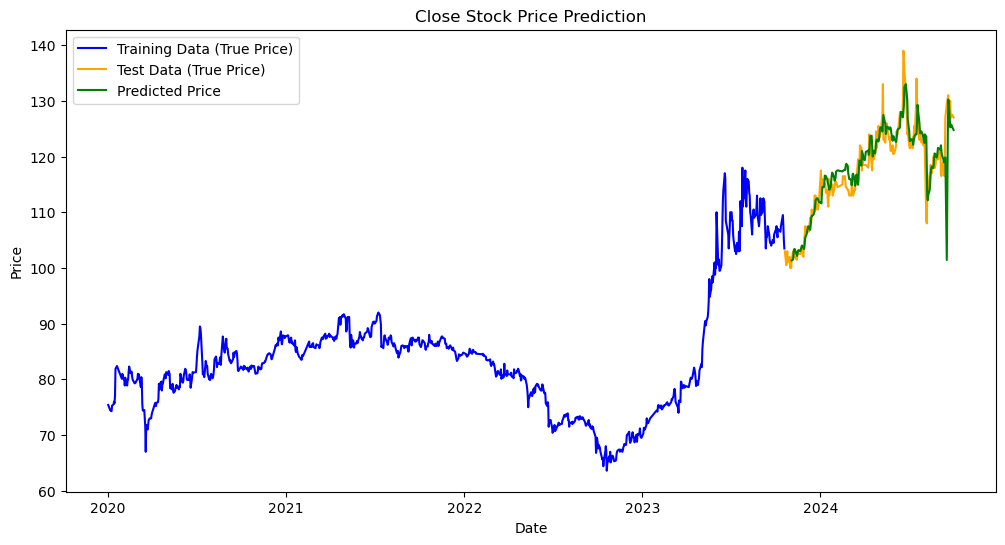

In [22]:
result = lstm_predict_stock(df)

---- 開盤價預測 ----
Epoch 1/100
24/24 [==============================] - 4s 39ms/step - loss: 0.1372 - val_loss: 0.0150
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0295 - val_loss: 0.0135
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0246 - val_loss: 0.0124
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0215 - val_loss: 0.0220
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0201 - val_loss: 0.0099
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0186 - val_loss: 0.0252
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0191 - val_loss: 0.0436
Epoch 8/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0231 - val_loss: 0.0141
Epoch 9/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0143 - val_loss: 0.0096
Epoch 10/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0138 - val_loss

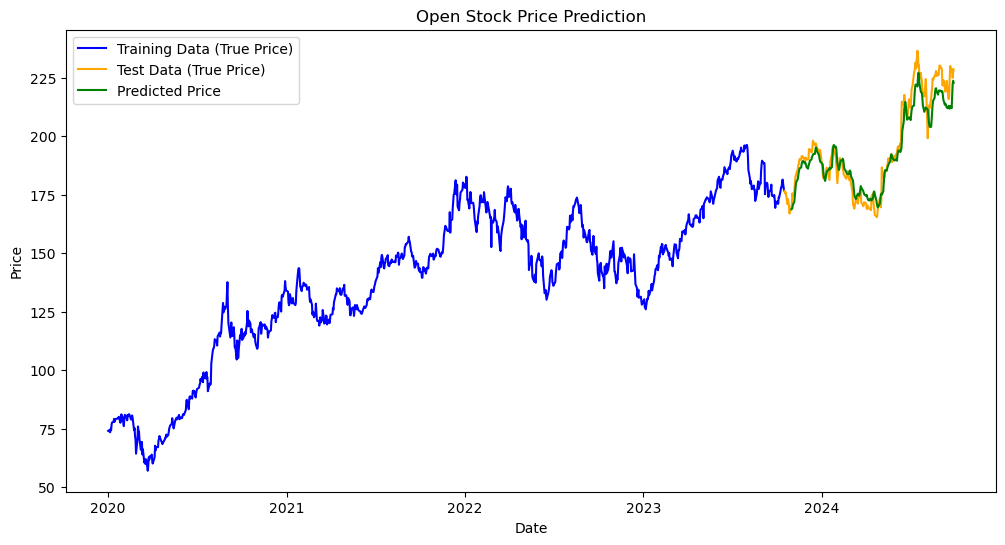

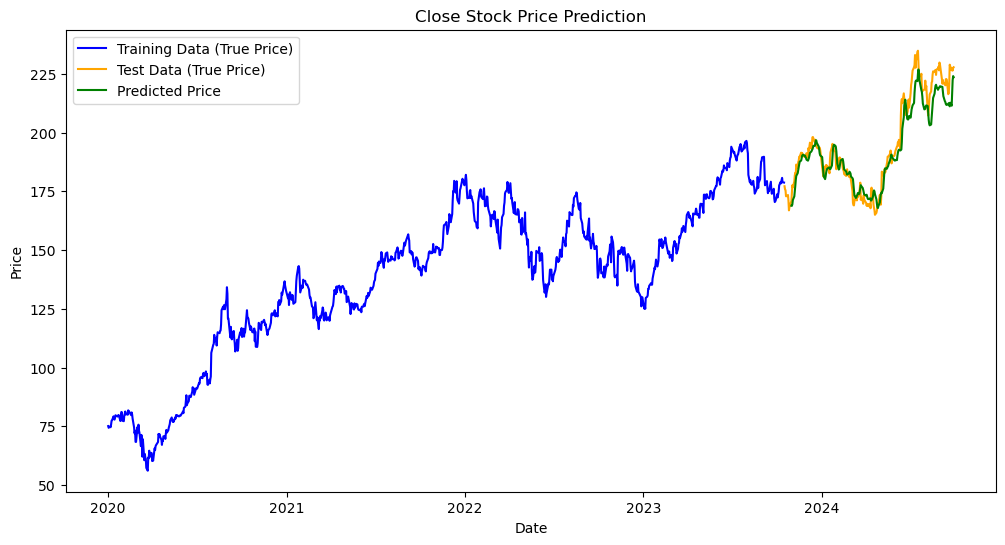

In [23]:
result_yahoo = lstm_predict_stock(df_yahoo)

# **Machine Learning(Transformer)**

In [24]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import math
import torch.optim as optim

In [61]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=128):  # 設置較大的 max_len 以確保覆蓋所有序列長度
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        self.max_len = max_len

    def forward(self, x):
        seq_len = x.size(0)
        pe = torch.zeros(seq_len, self.d_model, device=x.device)
        position = torch.arange(0, seq_len, dtype=torch.float, device=x.device).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, self.d_model, 2, device=x.device).float() * (-math.log(10000.0) / self.d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        x = x + pe.unsqueeze(1)
        return x

class TransformerTimeSeriesModel(nn.Module):
    def __init__(self, input_size, hidden_size=512, num_layers=6, num_heads=32, dropout=0.2):
        super(TransformerTimeSeriesModel, self).__init__()
        
        self.embedding = nn.Linear(input_size, hidden_size)
        self.positional_encoding = PositionalEncoding(hidden_size, max_len=500)
        
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        self.fc1 = nn.Linear(hidden_size, 512)
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(dropout)
        self.fc_out = nn.Linear(256, 1)

    def forward(self, src):
        embedded_src = self.embedding(src)
        embedded_src = self.positional_encoding(embedded_src)
        embedded_src = embedded_src.permute(1, 0, 2)
        
        transformer_output = self.transformer_encoder(embedded_src)
        output = transformer_output[-1]
        
        output = torch.relu(self.fc1(output))
        output = self.dropout1(output)
        output = torch.relu(self.fc2(output))
        output = self.dropout2(output)
        output = self.fc_out(output)
        
        return output


In [62]:
class EarlyStopping:
    def __init__(self, patience=10, delta=0, path='checkpoint.pt', verbose=False):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0


In [63]:
def train_and_predict_transformer(df, look_back=10, epochs=100):
    # 準備訓練和測試資料
    X_train, y_train_open_scaled, X_test, y_test_open_scaled, y_train_close_scaled, y_test_close_scaled, test_data, scaler_open, scaler_close = train_data(df, look_back)

    # 初始化 Transformer 模型
    input_size = X_train.shape[2]
    model_open = TransformerTimeSeriesModel(input_size=input_size)
    model_close = TransformerTimeSeriesModel(input_size=input_size)

    # 定義損失函數和優化器
    criterion = nn.MSELoss()
    optimizer_open = optim.Adam(model_open.parameters(), lr=0.0001, weight_decay=1e-4)
    optimizer_close = optim.Adam(model_close.parameters(), lr=0.0001, weight_decay=1e-4)

   # 初始化早停機制
    early_stopping_open = EarlyStopping(patience=10, verbose=True)
    early_stopping_close = EarlyStopping(patience=10, verbose=True)

    # results = {}

    train_losses_open, train_losses_close = [], []

    # 訓練開盤價 Transformer 模型
    print("---- 開盤價 Transformer 模型訓練 ----")
    for epoch in range(epochs):
        model_open.train()
        optimizer_open.zero_grad()
        outputs = model_open(torch.tensor(X_train, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train_open_scaled, dtype=torch.float32))
        loss.backward()
        optimizer_open.step()

        train_losses_open.append(loss.item())

        # 早停檢查
        early_stopping_open(loss.item())
        if early_stopping_open.early_stop:
            print(f"早停在開盤價模型的 epoch {epoch + 1}")
            break

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

     # 使用模型生成開盤價預測
    model_open.eval()
    with torch.no_grad():
        predicted_open = model_open(torch.tensor(X_test, dtype=torch.float32)).numpy().reshape(-1, 1)
    # evaluate_and_store_results("Transformer_Open", model_open, X_train, y_train_open_scaled, X_test, y_test_open_scaled, results, "Open")

    # 訓練收盤價 Transformer 模型
    print("---- 收盤價 Transformer 模型訓練 ----")
    for epoch in range(epochs):
        model_close.train()
        optimizer_close.zero_grad()
        outputs = model_close(torch.tensor(X_train, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train_close_scaled, dtype=torch.float32))
        loss.backward()
        optimizer_close.step()

        train_losses_close.append(loss.item())

        # 早停檢查
        early_stopping_close(loss.item())
        if early_stopping_close.early_stop:
            print(f"早停在收盤價模型的 epoch {epoch + 1}")
            break
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    # 使用模型生成收盤價預測
    model_close.eval()
    with torch.no_grad():
        predicted_close = model_close(torch.tensor(X_test, dtype=torch.float32)).numpy().reshape(-1, 1)

    # evaluate_and_store_results("Transformer_Close", model_close, X_train, y_train_close_scaled, X_test, y_test_close_scaled, results, "Close")

    # 從 results 中提取預測值以進行可視化
    # predicted_open = results["Transformer_Open"]["y_pred_Open"]
    # predicted_close = results["Transformer_Close"]["y_pred_Close"]

    # 反標準化
    predicted_open = scaler_open.inverse_transform(predicted_open).flatten()
    predicted_close = scaler_close.inverse_transform(predicted_close).flatten()

    # 可視化結果
    plot_stock_prediction(df, df[:int(len(df) * 0.8)], test_data, predicted_open, feature='Open')
    plot_stock_prediction(df, df[:int(len(df) * 0.8)], test_data, predicted_close, feature='Close')

    return {
        'predicted_open': predicted_open,
        'predicted_close': predicted_close
    }

c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\miche\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

---- 開盤價 Transformer 模型訓練 ----
Epoch [10/100], Loss: 0.0788
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
Epoch [20/100], Loss: 0.0471
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 1 out of 10
Epoch [30/100], Loss: 0.0298
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
Epoch [40/100], Loss: 0.0224
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 1 out of 10
Epoch [50/100], Loss: 0.0205
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping count

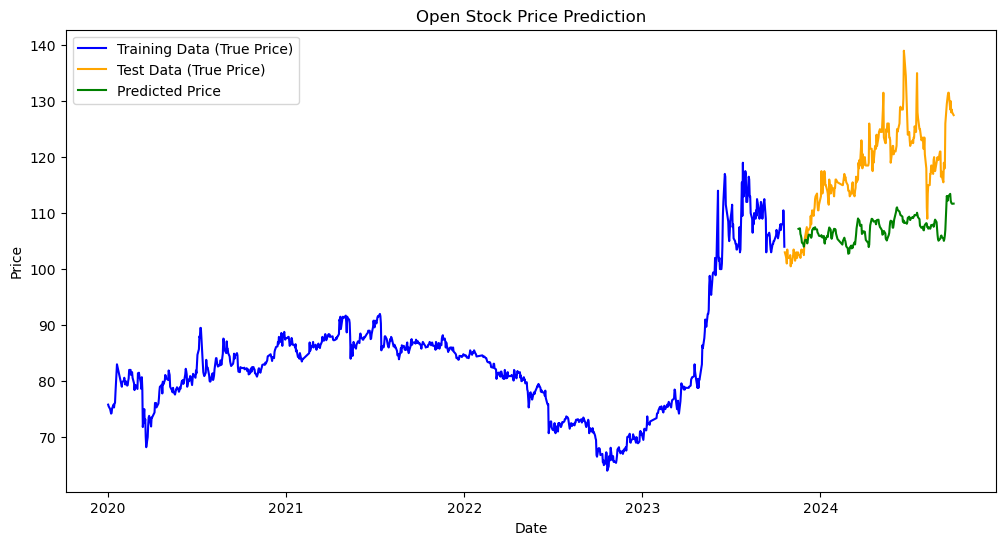

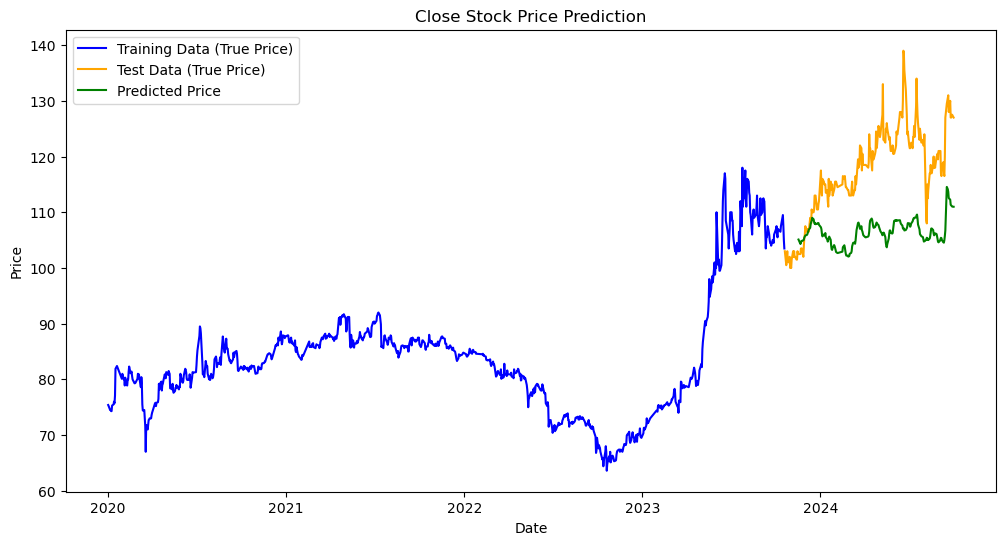

In [64]:
open_df, close_df = train_and_predict_transformer(df, look_back=20, epochs=100)

---- 開盤價 Transformer 模型訓練 ----
Epoch [10/100], Loss: 0.1077
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
Epoch [20/100], Loss: 0.0365
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
Epoch [30/100], Loss: 0.0255
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
Epoch [40/100], Loss: 0.0199
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 1 out of 10
Epoch [50/100], Loss: 0.0158
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping count

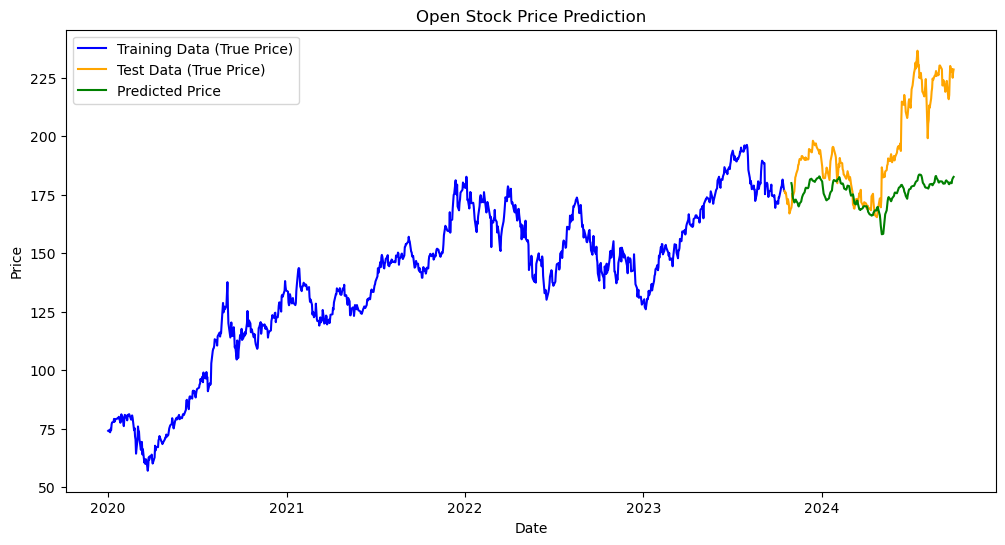

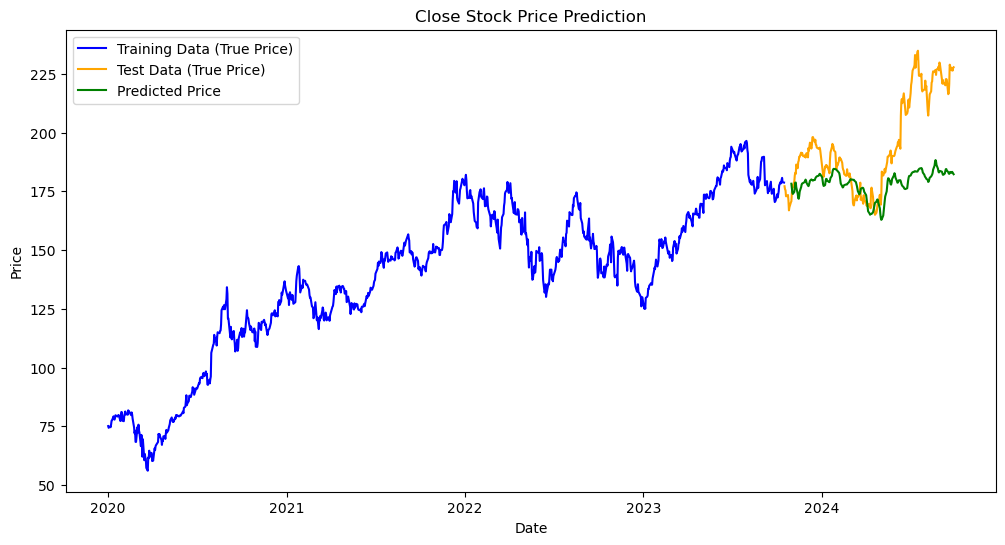

In [65]:
open_yahoo, close_yahoo =train_and_predict_transformer(df_yahoo, look_back=10, epochs=100)